In [138]:
%matplotlib inline
import numpy as np
import librosa
import librosa.display
import pandas as pd
import IPython.display as ipd
from IPython.display import Audio
import sklearn
import matplotlib.pyplot as plt
import seaborn
import requests
import os
from sklearn.preprocessing import StandardScaler

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(5168, 12)

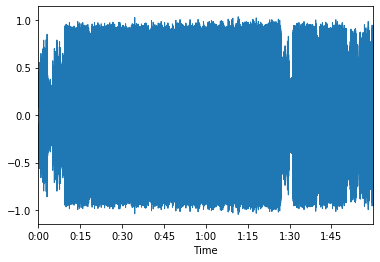

In [139]:
arr = librosa.load('sorry.mp3', duration=120)

librosa.display.waveplot(arr[0])

ipd.Audio(arr[0], rate = 22050)

mfcc_sorry = librosa.feature.mfcc(arr[0], n_mfcc = 12)

mfcc_sorry = mfcc_sorry.T
mfcc_sorry.shape



/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(5168, 12)

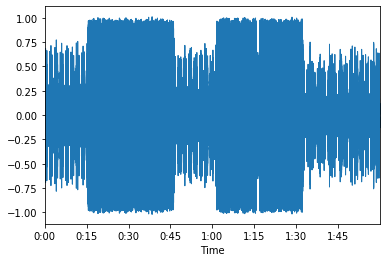

In [140]:
arr2 = librosa.load('wdym.mp3', duration=120)

librosa.display.waveplot(arr2[0])

ipd.Audio(arr2[0], rate = 22050)

mfcc_wdym = librosa.feature.mfcc(arr2[0], n_mfcc = 12)

mfcc_wdym = mfcc_wdym.T
mfcc_wdym.shape



/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(5168, 12)

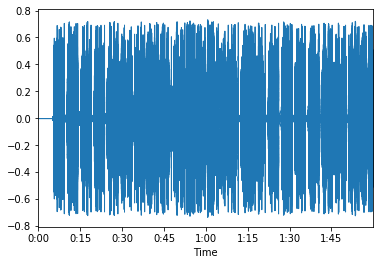

In [141]:
arr3 = librosa.load('loveyourself.mp3', duration=120)

librosa.display.waveplot(arr3[0])

ipd.Audio(arr3[0], rate = 22050)

mfcc_ly = librosa.feature.mfcc(arr3[0], n_mfcc = 12)

mfcc_ly = mfcc_ly.T
mfcc_ly.shape

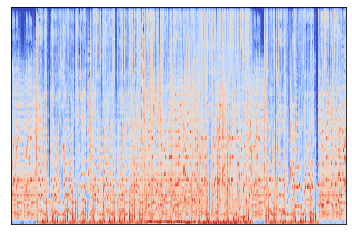

In [142]:
mel = librosa.feature.melspectrogram(arr[0])
mel_log = librosa.power_to_db(mel)
librosa.display.specshow(mel_log)

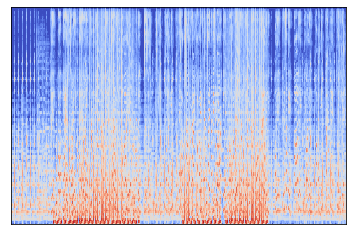

In [143]:
mel2 = librosa.feature.melspectrogram(arr2[0])
mel2_log = librosa.power_to_db(mel2)
librosa.display.specshow(mel2_log)

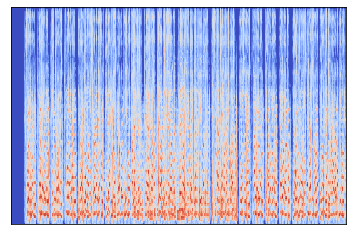

In [144]:
mel3 = librosa.feature.melspectrogram(arr3[0])
mel3_log = librosa.power_to_db(mel3)
librosa.display.specshow(mel3_log)

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(5168, 12)

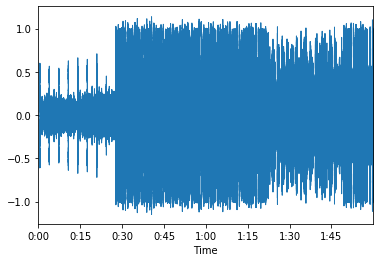

In [145]:
arr4 = librosa.load('moneytrees.mp3', duration=120)

librosa.display.waveplot(arr4[0])

ipd.Audio(arr4[0], rate = 22050)

mfcc_trees = librosa.feature.mfcc(arr4[0], n_mfcc = 12)

mfcc_trees = mfcc_trees.T
mfcc_trees.shape


/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(5168, 12)

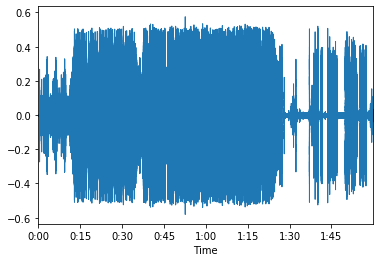

In [146]:
arr5 = librosa.load('bf.mp3', duration=120)

librosa.display.waveplot(arr5[0])

ipd.Audio(arr5[0], rate = 22050)

mfcc_bf = librosa.feature.mfcc(arr5[0], n_mfcc = 12)

mfcc_bf = mfcc_bf.T
mfcc_bf.shape

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(5168, 12)

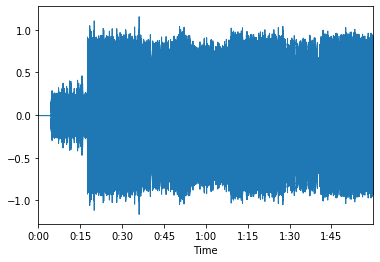

In [147]:
arr6 = librosa.load('maadcity.mp3', duration=120)

librosa.display.waveplot(arr6[0])

ipd.Audio(arr6[0], rate = 22050)

mfcc_maad = librosa.feature.mfcc(arr6[0], n_mfcc = 12)

mfcc_maad = mfcc_maad.T
mfcc_maad.shape

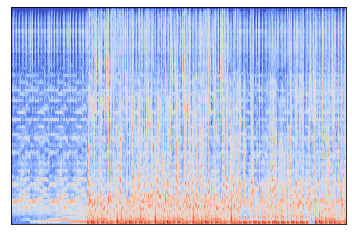

In [148]:
mel4 = librosa.feature.melspectrogram(arr4[0])
mel4_log = librosa.power_to_db(mel4)
librosa.display.specshow(mel4_log)

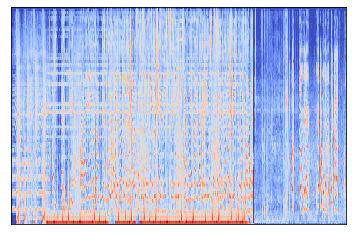

In [149]:
mel5 = librosa.feature.melspectrogram(arr5[0])
mel5_log = librosa.power_to_db(mel5)
librosa.display.specshow(mel5_log)

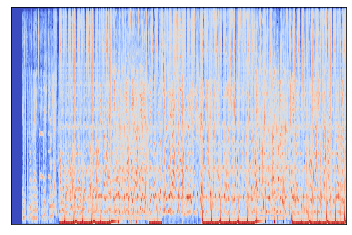

In [150]:
mel6 = librosa.feature.melspectrogram(arr6[0])
mel6_log = librosa.power_to_db(mel6)
librosa.display.specshow(mel6_log)

Initial discussion of results:

It seems that there are some similar patterns emerging between both artists. With the songs by Justin Bieber, the
waveplot seems to alter between having high amplitudes and medium amplitudes, which can be a reflection of the 
patterns that are present within the song. Pop songs tend to follow a more specific progression of having high points and low points, whereas the hip hop songs tend to be much more scattered throughout. I think this a particularly interesting test case as the classifier may have an easier time differentiating between the Justin Bieber songs because they have a simpler progression, whereas the complex waveform of the Kendrick Lamar songs may be much more hard to differentiate song to song. Initially, we hypothesized that the differentiation in songs would be easier to tell for the songs that were more complex, but upon Exploratory analysis it is quite possible that the results will point to the contrary. The spectrograms showed very similar results since the Justin Bieber songs show a more balanced and simplistic spectrogram whereas the songs by Kendrick Lamar don't have much of a pattern to them.

Moving onto the second part of this case study, I am going to be analyzing the SVC model's ability to differentiate between all combinations of each artist's songs as a way of getting further insight into their similarities and differences

In [151]:
#Function for a genre classifier of two different audios
def genre_classifier(audio1, audio2):
    
    #Load 120 seconds of the audios
    song1 = librosa.load(audio1, duration = 120)
    song2 = librosa.load(audio2, duration = 120)
    
    #Prepare scaling the features to have zero mean and unit variance
    scaler = sklearn.preprocessing.StandardScaler()
    
    #Calculate the MFCC for audio1
    mfcc_song1 = librosa.feature.mfcc(song1[0], song1[1])
    mfcc_song1 = mfcc_song1.T
    #Scale the MFCC
    mfcc_song1_scaled = scaler.fit_transform(mfcc_song1)
    
    #Calculate the MFCC for audio2
    mfcc_song2 = librosa.feature.mfcc(song2[0], song2[1])
    mfcc_song2 = mfcc_song2.T
    #Scale the MFCC
    mfcc_song2_scaled = scaler.fit_transform(mfcc_song2)
    
    #Concatenate all of the scaled feature vectors into one feature table 
    features = np.vstack((mfcc_song1_scaled, mfcc_song2_scaled))
    labels = np.concatenate((np.zeros(len(mfcc_song1_scaled)), np.ones(len(mfcc_song2_scaled))))
    
    # Support Vector Machine
    model = sklearn.svm.SVC()
    #Train the classifier
    model.fit(features, labels)
    
    #Load smaller samples of the audios
    x_song1_test, fs_song1 = librosa.load(audio1, duration=10, offset=120)
    x_song2_test, fs_song2 = librosa.load(audio2, duration=10, offset=120)
    
    #Calculate the MFCCs for the two samples
    mfcc_song1_test = librosa.feature.mfcc(x_song1_test, fs_song1)
    mfcc_song1_test = mfcc_song1_test.T
    mfcc_song2_test = librosa.feature.mfcc(x_song2_test, fs_song2)
    mfcc_song2_test = mfcc_song2_test.T
    
    #Scale the MFCCs
    mfcc_song1_test_scaled = scaler.fit_transform(mfcc_song1_test)
    mfcc_song2_test_scaled = scaler.fit_transform(mfcc_song2_test)
    
    #Concatenate all test features together
    test_features = np.vstack((mfcc_song1_test_scaled, mfcc_song2_test_scaled))
    #Concatenate all test labels together 
    test_labels = np.concatenate((np.zeros(len(mfcc_song1_test_scaled)), np.ones(len(mfcc_song2_test_scaled))))
    
    #Compute the accuracy score of the classifier on the test data
    score = model.score(test_features, test_labels)
    return score

In [152]:
genre_classifier('sorry.mp3', 'wdym.mp3')

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


0.8259860788863109

In [153]:
genre_classifier('sorry.mp3', 'loveyourself.mp3')

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


0.8375870069605569

In [154]:
genre_classifier('wdym.mp3', 'loveyourself.mp3')

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


0.9106728538283063

In [155]:
genre_classifier('bf.mp3', 'maadcity.mp3')

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


0.6589327146171694

In [156]:
genre_classifier('bf.mp3', 'moneytrees.mp3')

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


0.5754060324825986

In [157]:
genre_classifier('maadcity.mp3', 'moneytrees.mp3')

/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/adamkreitzman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


0.7679814385150812

As I theorized above, there was a chance that the model was going to have a much easier time differentiating between the different Justin Bieber songs, and that was absolutely the case. The model accuracy between the different Justin Bieber songs ranged between .826 and .911, which is a fairly high accuracy considering the songs came from not just the same genre, but the same artist as well. On the other hand, the classifier running on the Kendrick Lamar songs had a much lower accuracy, ranging from .575 to .768, which is fairly low for a binary classifier. Based on the initial analysis, I think this result is indicative that the sporadic style of hip hop and Kendrick Lamar specifically makes it harder to differentiate between songs, given that different periods of each Kendrick song exude vastly different sounds. This makes it hard to take anything away based on our initial hypothesis that the similarity of pop style artists would lead to lower accuracy scores because of their similarity, but it doesn't necessarily mean that we can't draw ANY conclusions. For one, in order to gain more insight we would definitely need to try new things such as examining chord progression and sentiment, as the MFCC and waveplots measure things like timbre and noise level which isn't the only available features of music.